In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset (replace path if needed)
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check dataset info
df.info()

# Drop customerID (not useful for prediction)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (some values might be blank)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical columns
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Churn":
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-792883565.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [4]:
# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Train model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)


Accuracy: 0.7991483321504613

Confusion Matrix:
 [[921 114]
 [169 205]]


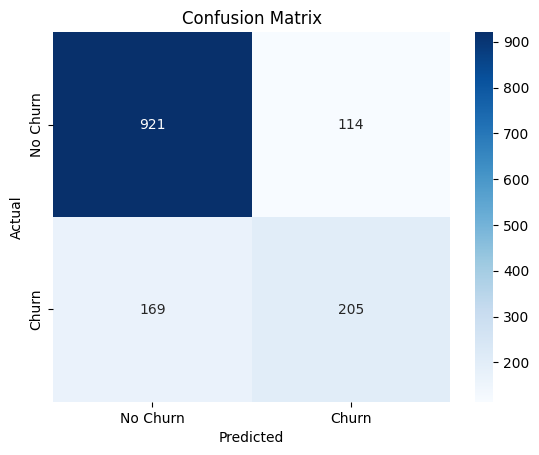


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [9]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualization of Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [10]:
# Manually explain confusion matrix results
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN} → Correctly predicted NO churn")
print(f"False Positives (FP): {FP} → Incorrectly predicted churn when actually NO churn")
print(f"False Negatives (FN): {FN} → Missed churn customers")
print(f"True Positives (TP): {TP} → Correctly predicted churn customers")

print("\nInterpretation:")
print(f"- Accuracy: {acc:.2f}")
print("- The confusion matrix shows how well the model distinguishes between churn and non-churn customers.")
print("- True Positives (TP) are most important because they represent correctly identified churn customers.")
print("- High FN means the model is missing potential churners (bad for business).")


True Negatives (TN): 921 → Correctly predicted NO churn
False Positives (FP): 114 → Incorrectly predicted churn when actually NO churn
False Negatives (FN): 169 → Missed churn customers
True Positives (TP): 205 → Correctly predicted churn customers

Interpretation:
- Accuracy: 0.80
- The confusion matrix shows how well the model distinguishes between churn and non-churn customers.
- True Positives (TP) are most important because they represent correctly identified churn customers.
- High FN means the model is missing potential churners (bad for business).
